# Projeto 2 - Predição 

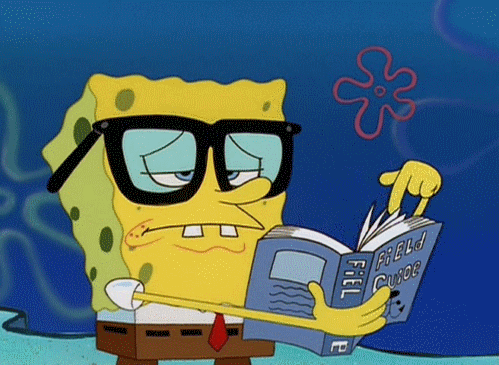

## Parte A - Introdução 


#### carregando as bibliotecas necessárias 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

#### verificando o repositório 

In [2]:
import os
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')



Esperamos trabalhar no diretório: 
C:\Users\leand\OneDrive\Documentos\CDADOS\trabalho cdados\22-1b-cd-p2-leandra_taina-4



#### carregando a base de Dados

In [3]:
dados = pd.read_csv('dados.csv')
dados=dados.dropna()  #retirando as linhas sem informações 
#dados.isnull().sum()
print("O tamanho da base de dados é de ", len(dados))

O tamanho da base de dados é de  10642


#### Conhecendo o nosso Data Frame 

In [4]:
dados.head()


,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


In [5]:
dados.describe()

,ISBN_13,ano,paginas,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,male,female
count,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,9.785962e+12,2009.246664,280.068408,3.859500,122.017196,50.500094,37.996053,10.640387,152.303890,53.538433,129.113043,26.246476,73.177786
std,1.461899e+11,58.905509,165.168242,0.708709,205.440090,125.526660,118.393596,60.553771,234.507585,129.305753,208.438098,19.427422,20.116669
min,8.551005e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.788533e+12,2007.000000,176.000000,3.600000,6.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,10.000000,61.000000
50%,9.788551e+12,2012.000000,260.000000,4.000000,26.000000,5.000000,3.000000,0.000000,35.000000,8.000000,31.000000,23.000000,76.000000
75%,9.788579e+12,2016.000000,352.000000,4.200000,130.000000,33.000000,16.000000,2.000000,195.000000,38.000000,146.000000,38.000000,89.000000
max,9.999097e+12,2021.000000,4606.000000,10.000000,999.000000,985.000000,993.000000,877.000000,999.000000,994.000000,999.000000,100.000000,100.000000


In [6]:
#dados.drop(columns=[''])

## Parte B- Minerando Dados as Características do Dataset 

In [7]:
#verificando os anos pertercentes a coluna anos no dataFrame 
lista=[]
anos=dados.ano
for ano in anos: 
    if ano not in lista: 
        lista.append(ano)
#print(lista)
autor=dados.autor
print(autor)


0                 Nath Finanças
1        Kate Elizabeth Russell
2                  Blake Crouch
3               Antonio Scurati
4                Robert Kirkman
                  ...          
11970           Fernando Pessoa
11971           Fernando Pessoa
11972             Lewis Wallace
11973              Walt Whitman
11974            Huberto Rohden
Name: autor, Length: 10642, dtype: object


In [8]:
lista=[]
for gen in dados.genero: 
    if gen not in lista: 
        lista.append(gen)
# print(lista)

In [9]:
dados.value_counts(normalize=True)
base=dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["genero"]).abandonos.mean().sort_values(ascending=False).head(10)

genero
Autoajuda / Literatura Brasileira / Romance                                                                989.0
Fantasia / Infantojuvenil / Literatura Estrangeira / Aventura / Ficção / Romance / Suspense e Mistério     954.0
Aventura / Fantasia / Infantojuvenil / Literatura Estrangeira / Ficção / Romance / Suspense e Mistério     954.0
Contos / Ficção / Literatura Estrangeira / Aventura                                                        937.0
Ficção / Literatura Estrangeira / Suspense e Mistério / Terror / Cinema / Romance / Drama / Horror         928.0
Ficção / Filosofia / Literatura Estrangeira / Poemas, poesias / Romance                                    905.0
]Horror / Suspense e Mistério / Ficção / Literatura Estrangeira                                            880.0
Literatura Estrangeira / Ficção / Distopia / Infantojuvenil                                                877.0
 Artes / Literatura Estrangeira / Não-ficção                                             

In [10]:
lista=[]
abandonos=dados.abandonos
for ab in abandonos: 
    if ab not in lista: 
        lista.append(ab)

* ### Variáveis Qualitativas- Tabelas cruzadas


In [11]:
lista=[]
for res in dados.resenha: 
    if res not in lista: 
        lista.append(res)
        
# print(lista)

In [12]:
dados.value_counts(normalize=True)
base=dados.groupby(["resenha"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["resenha"]).abandonos.mean().sort_values(ascending=False).head(10)

resenha
583    989.0
659    979.0
506    880.0
452    862.0
301    835.0
930    816.0
817    813.0
338    807.0
367    791.0
217    789.0
Name: abandonos, dtype: float64

In [13]:
lista=[]
for des in dados.descricao: 
    if des not in lista: 
        lista.append(des)
        
print(lista)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
lista=[]
for a in dados.autor: 
    if a not in lista: 
        lista.append(a)
        
#print(lista)

In [15]:
lista=[]
for idi in dados.idioma: 
    if idi not in lista: 
        lista.append(idi)
        
# print(lista)


In [16]:
dados.value_counts(normalize=True)
base=dados.groupby(["idioma"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["idioma"]).abandonos.mean().sort_values(ascending=False).head(10)

idioma
português    38.348917
inglês        9.920000
francês       1.000000
espanhol      0.625000
holandês      0.000000
italiano      0.000000
Name: abandonos, dtype: float64

In [17]:
data = dados.loc[dados['autor'] == 'Kate Elizabeth Russell','abandonos']
data

1    48
Name: abandonos, dtype: int64

In [18]:

dados.value_counts(normalize=True)
base=dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["autor"]).abandonos.mean().sort_values(ascending=False).head(10)


autor
Thomas Bulfinch        937.000000
Friedrich Nietzsche    905.000000
Almeida Garrett        608.000000
Nancy Jo Sales         589.000000
Timur Vermes           460.000000
Isabela Freitas        423.625000
Arthur Golden          420.000000
Alyson Noël            417.105263
Jonathan Swift         414.000000
Esther Earl            410.000000
Name: abandonos, dtype: float64

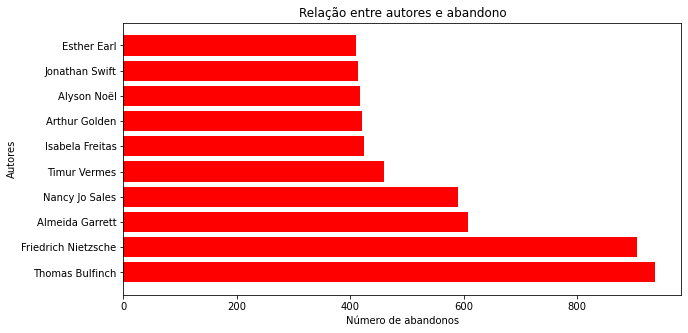

In [19]:
lista_names = ['Thomas Bulfinch', 'Friedrich Nietzsche','Almeida Garrett', 'Nancy Jo Sales', 'Timur Vermes', 'Isabela Freitas','Arthur Golden','Alyson Noël', 'Jonathan Swift', 'Esther Earl']
lista_valores= []
for i in base: 
    lista_valores.append(i)
    
plt.figure(figsize=(10, 5))

plt.barh(lista_names, lista_valores, color='red')
plt.title("Relação entre autores e abandono")
plt.xlabel('Número de abandonos')
plt.ylabel("Autores")
plt.show()

In [20]:
#crossTab é apenas para qualitativas


base=dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)
dados.groupby(["editora"]).abandonos.mean().sort_values(ascending=False).head(10)

lista=[]

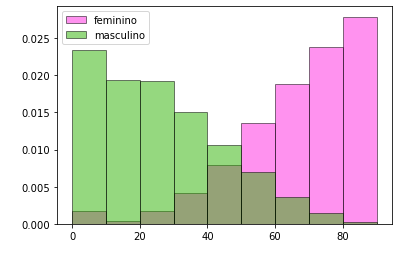

In [21]:
fem=dados.female
peso=dados['abandonos']



plt.hist(dados.female, bins=range(0,100,10), alpha=0.5, color='#FF26E1', edgecolor='black', label='feminino', density=True)
plt.hist(dados.male, bins=range(0,100,10), alpha=0.5, color='#2DB200', edgecolor='black', label='masculino', density=True)
plt.legend()
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("")
plt.show()

2017    787
2013    678
2015    668
2016    665
2019    655
       ... 
1981      1
1973      1
1965      1
1941      1
1884      1
Name: ano, Length: 61, dtype: int64

<Figure size 720x1080 with 0 Axes>

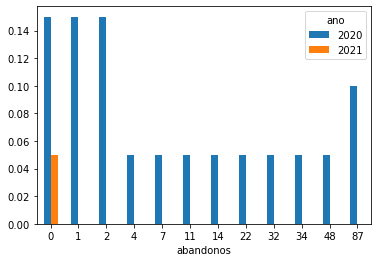

In [22]:

plt.figure(figsize=(10,15))
crosstab=pd.crosstab(dados.abandonos.head(20), dados.ano.head(20), normalize=True)
barplot=crosstab.plot.bar(rot=0)


dados.ano.value_counts()

Text(0.5, 0, 'Paginas')

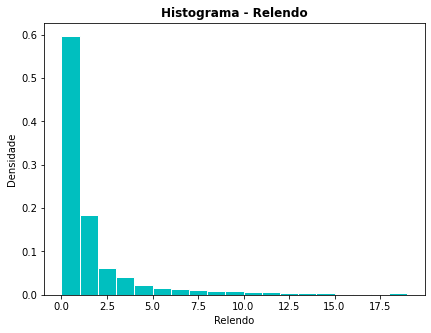

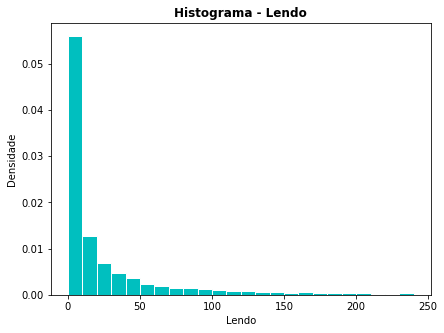

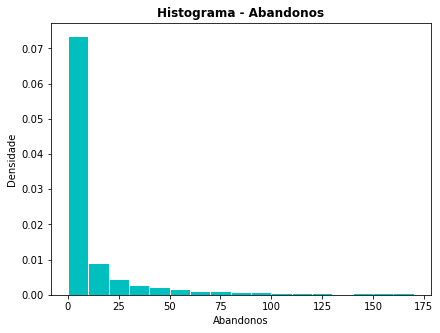

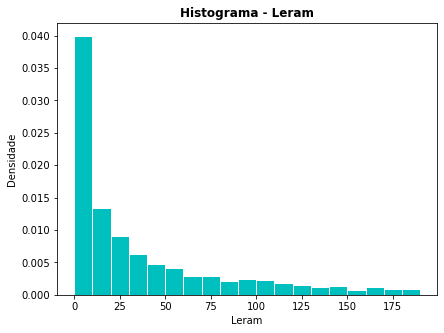

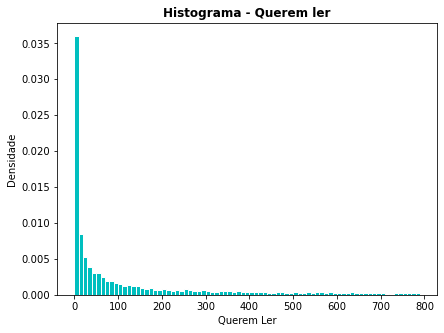

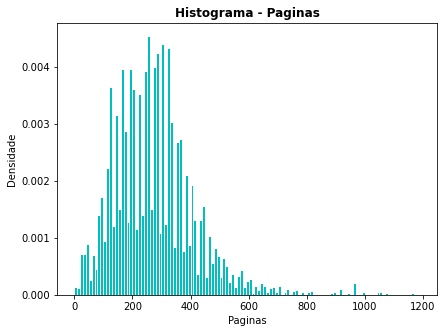

In [23]:
#Alguns histogramas
plt.figure(figsize=(15,23))
plt.subplot(421)
faixa = np.arange(0,20,1)
plt.hist(dados["relendo"],bins=faixa, density=True, edgecolor='white', color='c')
plt.title('Histograma - Relendo', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Relendo')

plt.figure(figsize=(15,23))
plt.subplot(422)
faixa = np.arange(0,250,10)
plt.hist(dados["lendo"],bins=faixa, density=True, edgecolor='white', color='c')
plt.title('Histograma - Lendo', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Lendo')

plt.figure(figsize=(15,23))
plt.subplot(423)
faixa = np.arange(0,174,10)
plt.hist(dados["abandonos"],bins=faixa, density=True, edgecolor='white', color='c')
plt.title('Histograma - Abandonos', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Abandonos')

plt.figure(figsize=(15,23))
plt.subplot(424)
faixa = np.arange(0,200,10)
plt.hist(dados["leram"],bins=faixa, density=True, edgecolor='white', color='c')
plt.title('Histograma - Leram', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Leram')

plt.figure(figsize=(15,23))
plt.subplot(425)
faixa = np.arange(0,800,10)
plt.hist(dados["querem_ler"],bins=faixa, density=True, edgecolor='white', color='c')
plt.title('Histograma - Querem ler', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Querem Ler')

plt.figure(figsize=(15,23))
plt.subplot(426)
faixa = np.arange(0,1200,10)
plt.hist(dados["paginas"],bins=faixa, density=True, edgecolor='white', color='c')
plt.title('Histograma - Paginas', fontweight = 600)
plt.ylabel('Densidade')
plt.xlabel('Paginas')

In [24]:
max(dados.paginas)

4606

C:\Users\leand\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([ 200000.,  300000.,  400000.,  500000.,  600000.,  700000.,
         800000.,  900000., 1000000., 1100000., 1200000., 1300000.,
        1400000., 1500000., 1600000., 1700000., 1800000., 1900000.,
        2000000., 2100000., 2200000., 2300000., 2400000., 2500000.,
        2600000., 2700000., 2800000., 2900000., 3000000., 3100000.,
        3200000., 3300000., 3400000., 3500000., 3600000., 3700000.,
        3800000., 3900000.]),
 <BarContainer object of 37 artists>)

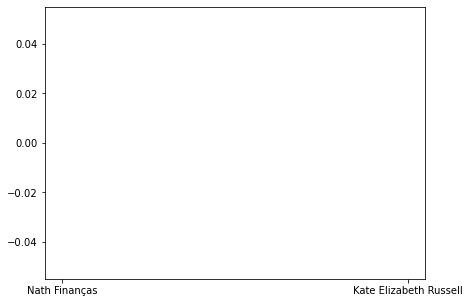

In [25]:
plt.figure(figsize=(15,23))
plt.subplot(421)
faixa = np.arange(2e5,4e6,1e5)
plt.hist(dados["autor"],bins=faixa, density=True, edgecolor='white', color='c')

C:\Users\leand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


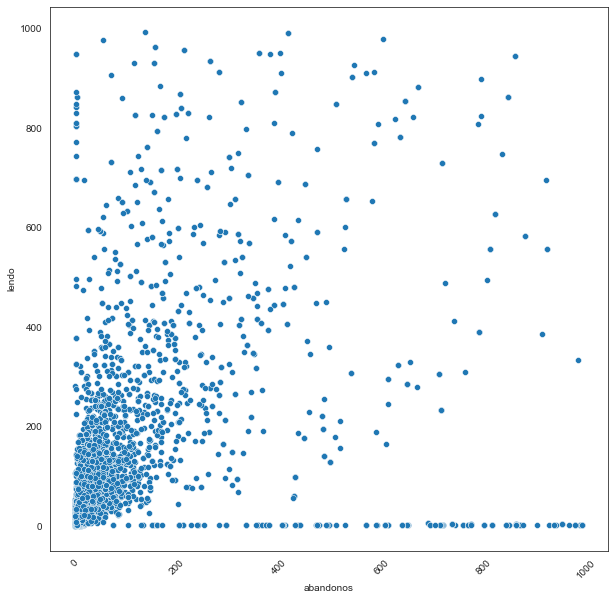

In [26]:
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('white')

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.scatterplot(dados.abandonos, dados.lendo)
plt.show()

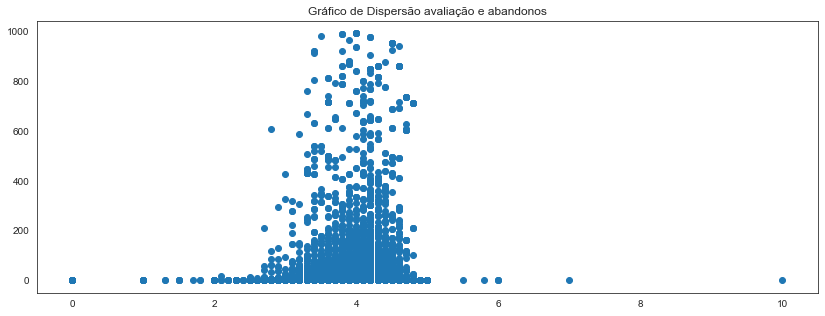

In [27]:
plt.figure(figsize=(14,5))
plt.scatter(dados['rating'],dados['abandonos'])
plt.title('Gráfico de Dispersão avaliação e abandonos')
plt.show()

In [28]:


import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import seaborn as sns

In [29]:
feature_columns=['rating', 'lendo','relendo','querem_ler', ]

X=dados[feature_columns]

Y=dados.abandonos
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.35389915440025055
Accuracy: 0.2896962104603821


Acurracy
0.7898764623116781

0.8597529341612291


C:\Users\leand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


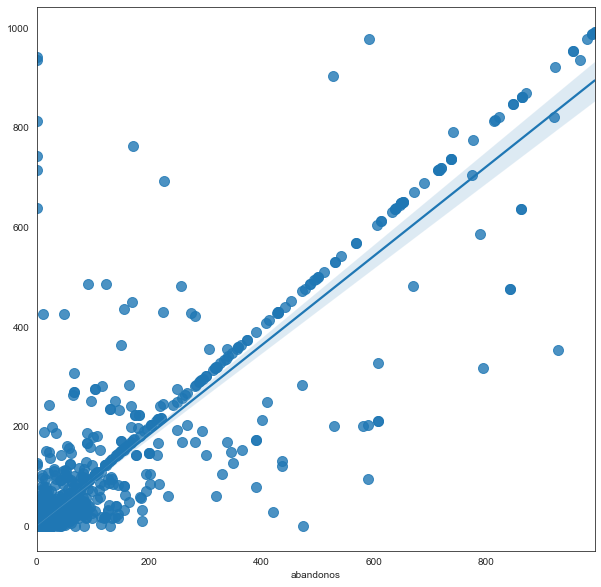

In [30]:
model=DecisionTreeRegressor()
model.fit(x_train, y_train)

expect_y=y_test
predict_y=model.predict(x_test)


print("Acurracy");print(metrics.r2_score(expect_y,predict_y))
print();print(metrics.mean_squared_log_error(expect_y, predict_y))


plt.figure(figsize=(10,10))
sns.regplot(expect_y, predict_y, scatter_kws={"s": 100} )
plt.show()

In [31]:
from sklearn import tree




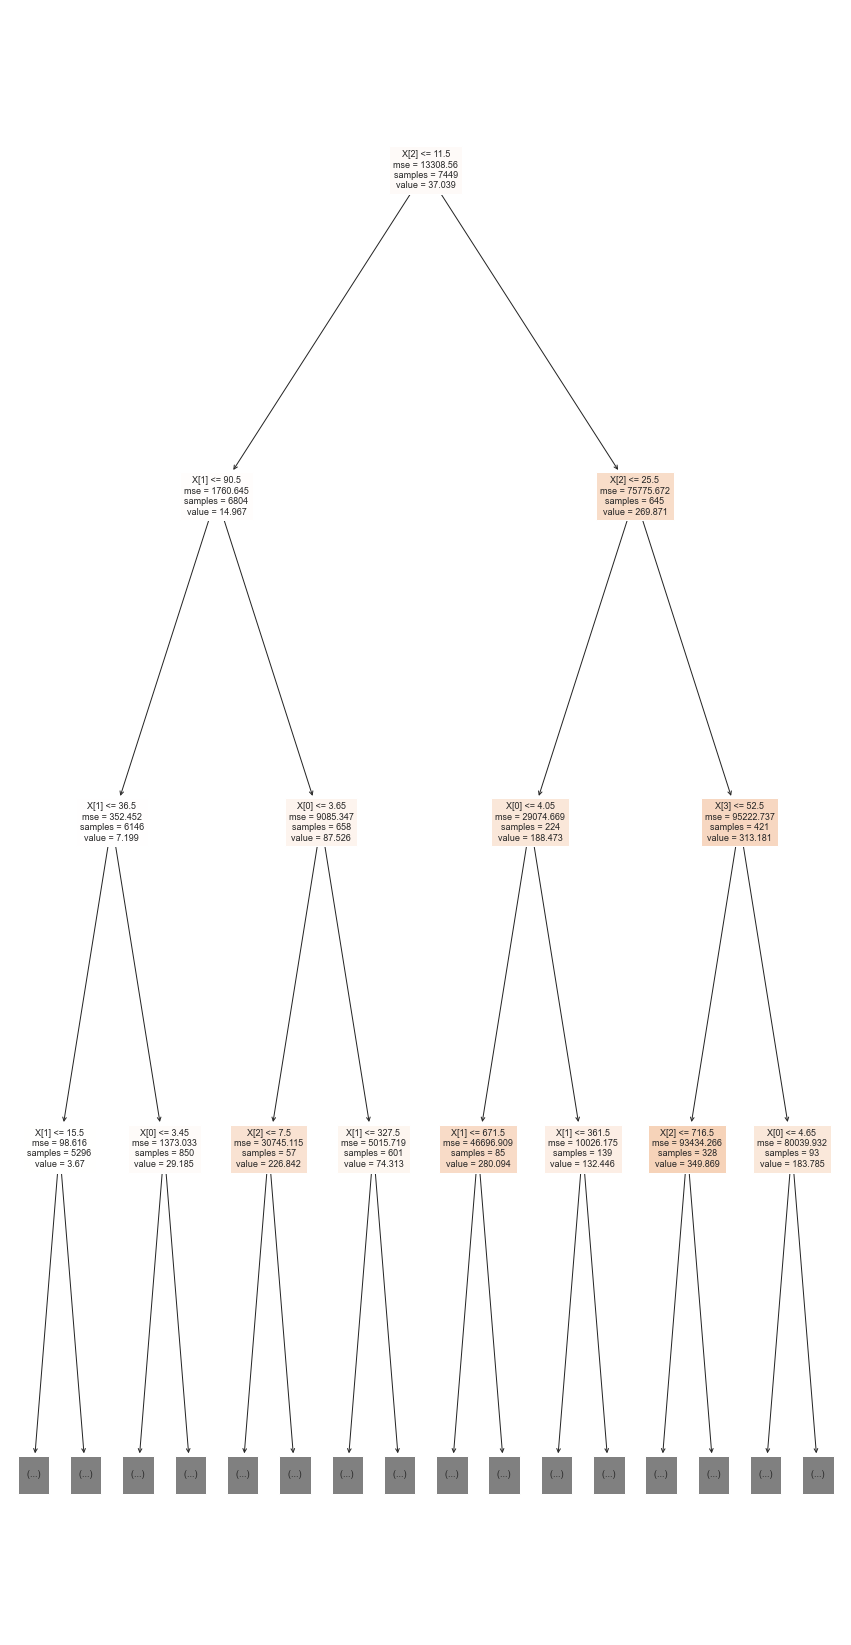

In [32]:
%matplotlib inline
plt.figure(figsize=(15,30))
tree.plot_tree(model,fontsize=9,filled=True,max_depth=3);